In [5]:
import matplotlib.pyplot as plt
import numpy as np
from utils.data.curating_stooq import curate_stooq_dir_5min  # use curate_stooq_dir_hourly for hourly
from utils.data.panel_to_long import panel_to_long_vector, windows_from_series
from utils.viz.wavelet_embed import embed_series_windows, plot_kpca_components
from model.wavelet.wavelet import WaveletModel

In [6]:

# X: shape (n_samples, 119), center at index 59
X = np.random.randn(100, 119)
wm = WaveletModel(n_layers=0, n_neurons=0, n_outputs=0, J=6, kernel="rbf", n_components=3)
Z = wm.fit_transform(X)  # Z shape: (100, 3)

In [7]:
print(Z)

[[-4.20388116e-02  2.66624757e-01 -2.32305859e-01]
 [ 3.63351146e-01  8.44823271e-02  2.40332224e-01]
 [-1.76051987e-01  1.45141468e-01 -5.89759896e-02]
 [-1.36446563e-01  7.69926107e-03 -1.86281354e-01]
 [-3.94634791e-02 -2.26609275e-01 -1.53666010e-02]
 [-1.14759491e-02  8.58382817e-02 -2.15916463e-02]
 [ 4.79158161e-02 -1.08022555e-01 -1.85085253e-01]
 [-1.65067447e-01 -2.43131849e-02  2.23923193e-01]
 [-6.67915432e-02  1.45115275e-01  2.26607301e-02]
 [ 4.73981990e-02 -2.61703481e-01  1.14799130e-01]
 [-1.87124506e-01 -2.94217292e-03 -9.31243983e-02]
 [ 2.25071567e-01  1.49585735e-01  9.39475812e-02]
 [-1.05709409e-01 -4.90447000e-03 -3.64257662e-02]
 [-3.17723936e-03 -1.84043879e-01  5.85410982e-02]
 [-1.26173873e-01  1.84141918e-02 -7.97521423e-02]
 [ 3.63921376e-03 -4.70491236e-02 -6.76330908e-02]
 [-1.85571393e-01  1.04699806e-01 -1.17392690e-01]
 [ 2.37748256e-02  4.11636614e-04  3.13652037e-02]
 [ 5.99869938e-02 -3.96343901e-03 -1.30399517e-01]
 [ 5.19614064e-02  2.34281072e-

In [16]:
# 1) load stooq data as 5-minute bars
data_dir = "/home/janis/4A/timeseries/data/stooq/hungary/"
dfs = curate_stooq_dir_5min(data_dir, pattern="*.txt", recursive=True, tz=None)  # 5-minute

# 2) build one long standardized log-return vector
x_long = panel_to_long_vector(
    dfs,
    value="log_return",
    price_col="close",
    standardize="zscore",
    zscore_clip=(-8.0, 8.0),
)

# we only keep 10 percent of the data
x_long = x_long[:int(len(x_long) * 0.1)]


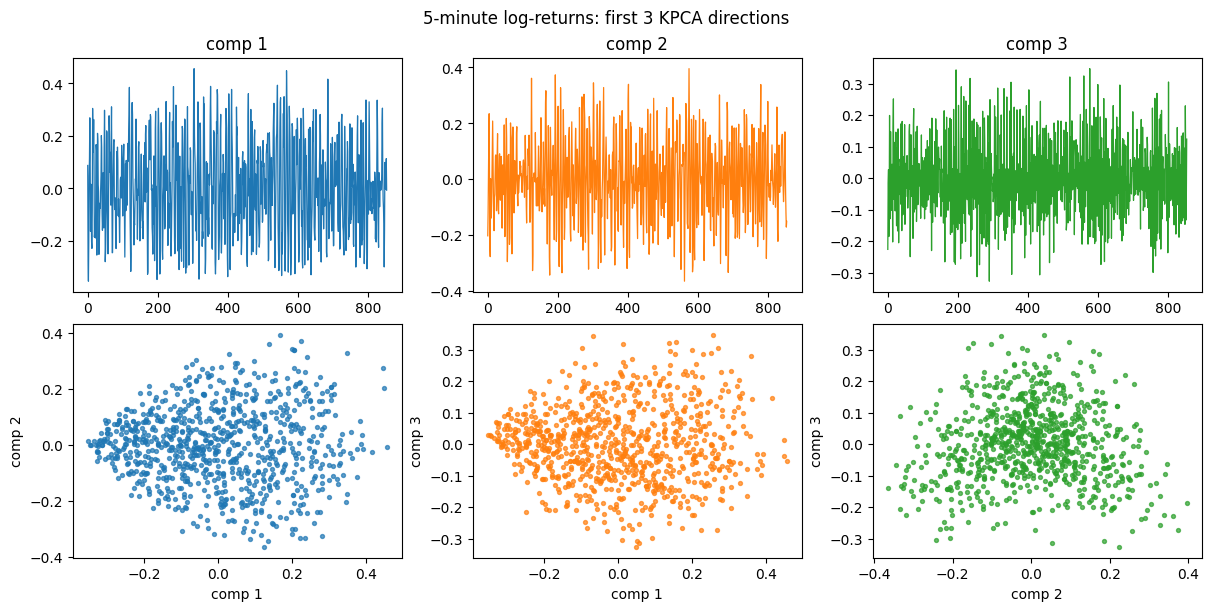

In [17]:

# 3) slice into overlapping windows (T=119, center at mid-point)
Xw = windows_from_series(x_long, window_len=119, stride=10)

# 4) wavelet features + kernel PCA → first 3 directions
Z, wm = embed_series_windows(Xw, J=6, kernel="rbf", n_components=3, random_state=0)

# 5) visualize comp1..3 (lines and pairwise scatters)
fig, axes = plot_kpca_components(Z, title="5-minute log-returns: first 3 KPCA directions")
plt.show()